In [1]:
import os
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# statmech library setup
sys.path.append('../../statmechlib')
from statmechlib.preprocessing import select_nodes, to_param_dict, to_param_list, insert_zero_params, rescale_manybody_params
from statmechlib.preprocessing import Trajectory, find_index, pair_dist_cutoff, universal_eos, downselect
from statmechlib.forcefields import utot_EAM_per_atom, utot_EAM_per_box, udif_print, u_core
from statmechlib.read_write import params_to_pickle

In [4]:
target_proc = '../data/target_processed'
working = '../data/working'
reports = '../reports'
pot_path = '../sim/potentials'

In [5]:
# params_file = 'marinica_params'
# stats_file = 'stats_manyall' # 'stats_samples'
# target_file = 'target_manyall' # 'target_samples'
stats_file = 'stats_all_samples' # 'stats_samples'
target_file = 'target_all_samples' # 'target_samples'
params_file = 'params_out'
params_old = 'params_optimal'
stats_md_file = 'stats_onlymd' # 'stats_samples'
target_md_file = 'target_onlymd' # 'stats_samples'

In [109]:
with open(os.path.join(working, stats_file+'.pickle'), 'rb') as fi:
    stats_all = pickle.load(fi)

with open(os.path.join(working, target_file+'.pickle'), 'rb') as fi:
    targets = pickle.load(fi)
    
with open(os.path.join(working, stats_md_file+'.pickle'), 'rb') as fi:
    stats_md = pickle.load(fi)

with open(os.path.join(working, target_md_file+'.pickle'), 'rb') as fi:
    targets_md = pickle.load(fi)

In [110]:
with open(os.path.join(working, params_file + '.pickle'), 'rb') as fi:
    param_list = pickle.load(fi)  
    
# original marinica params
with open(os.path.join(working, params_old + '.pickle'), 'rb') as fi:
    param_list_old = pickle.load(fi)  

In [111]:
len(param_list)

23

In [112]:
param_list = [param_list_old[0]] + param_list[-13:-11]#  + param_list[-2:]
print(len(param_list))

3


In [113]:
[(i, p) for i, p in enumerate(param_list)]

[(0,
  {'hyperparams': {u'edens': [2.5,
     2.8663175000000001,
     3.1000000000000001,
     3.5,
     4.5,
     4.9000000000000004],
    u'pair': [2.2200000000000002,
     2.46,
     2.5648974999999998,
     2.6297950000000001,
     2.6946924999999999,
     2.8663175000000001,
     2.9730449999999999,
     3.0797724999999998,
     3.5164724999999999,
     3.8464450000000001,
     4.1764175000000003,
     4.7008450000000002,
     4.8952999999999998,
     5.0897550000000003,
     5.3429525,
     5.4016950000000001,
     5.4604375000000003]},
   'params': {'edens': array([-4.20429108,  0.        ,  0.5182177 ,  0.05627208,  0.        ,
            0.03441642]),
    'embed': array([-5.946454, -0.049477]),
    'lrcorr': array([ 0.]),
    'pair': array([  0.00000000e+00,   0.00000000e+00,   9.60851701e+01,
            -1.84410924e+02,   9.35784080e+01,  -7.98358265e+00,
             7.47034093e+00,  -1.52756044e+00,   1.25205933e+00,
             1.63082162e+00,  -1.41854775e+00,  -8.1993

In [114]:
stats_all['md'] = stats_md['md']
targets['md'] = targets_md['md']

In [115]:
# targets['md']['box'][346:447] = 101*targets['inf']['box']
# targets['md']['xyz'][346:447] = 101*targets['inf']['xyz']
# targets['md']['temp'][346:447] = 101*targets['inf']['temp']
# targets['md']['beta'][346:447] = 101*targets['inf']['beta']
# targets['md']['energy'][346:447] = 101*targets['inf']['energy']
# targets['md']['forces'][346:447] = 101*targets['inf']['forces']
# stats_all['md']['energy'][346:447] = 101*stats_all['inf']['energy']
# stats_all['md']['forces'][346:447] = 101*stats_all['inf']['forces']

In [116]:
stats_list = []
for i, pars in enumerate(param_list):
    pair_knots = pars['hyperparams']['pair']
    edens_knots = pars['hyperparams']['edens']
    print(i, pair_knots, edens_knots)
    stats_list.append(downselect(stats_all, pair_knots, edens_knots))

(0, [2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.9730449999999999, 3.0797724999999998, 3.5164724999999999, 3.8464450000000001, 4.1764175000000003, 4.7008450000000002, 4.8952999999999998, 5.0897550000000003, 5.3429525, 5.4016950000000001, 5.4604375000000003], [2.5, 2.8663175000000001, 3.1000000000000001, 3.5, 4.5, 4.9000000000000004])
(1, [2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.9730449999999999, 3.0797724999999998, 3.5164724999999999, 3.8464450000000001, 4.1764175000000003, 4.7008450000000002, 4.8952999999999998, 5.0897550000000003, 5.3429525, 5.4016950000000001, 5.4604375000000003, 5.54, 5.5800000000000001, 5.6200000000000001], [2.2200000000000002, 2.5, 2.8663175000000001, 3.1000000000000001, 3.5, 4.6200000000000001])
(2, [2.1000000000000001, 2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.973044

In [117]:
param_list[1]

{'hyperparams': {u'edens': [2.2200000000000002,
   2.5,
   2.8663175000000001,
   3.1000000000000001,
   3.5,
   4.6200000000000001],
  u'pair': [2.2200000000000002,
   2.46,
   2.5648974999999998,
   2.6297950000000001,
   2.6946924999999999,
   2.8663175000000001,
   2.9730449999999999,
   3.0797724999999998,
   3.5164724999999999,
   3.8464450000000001,
   4.1764175000000003,
   4.7008450000000002,
   4.8952999999999998,
   5.0897550000000003,
   5.3429525,
   5.4016950000000001,
   5.4604375000000003,
   5.54,
   5.5800000000000001,
   5.6200000000000001]},
 'params': {'edens': [3987.36133,
   85.8053818,
   31.7983469,
   -1.52861585,
   -1.77508182,
   0.207405945],
  'embed': [-4.1635311, -0.00364115525],
  'lrcorr': [],
  'pair': [4525.61445,
   107.488634,
   -15.2604631,
   8.88626493,
   10.7120352,
   46.1310765,
   6.70641338,
   -7.14000617,
   -2.02174483,
   1.9897676,
   -1.35491449,
   -0.812592118,
   1.99278451,
   -0.484145757,
   -0.0478673818,
   -1.46201396,
   

In [118]:
# for key in sorted(targets.keys()):
#     for box, xyz, ene in zip(targets[key]['box'], targets[key]['xyz'], stats[key]['energy']):
#         n = len(xyz)
#         vol = np.linalg.det(box)
#         corr = float(n*n)/vol
#         ene.append([corr])

In [147]:
def plot_udif(targets, stats_list, params_list, traj_name, select=slice(None, None, None), x_lim=None, y_lim=None, x_ticks=None, shift=0.0, fname=None, verbose=0):
    
    plt.figure(figsize=(20,10))

    plt.title(traj_name, fontsize=30)
    
    # get target energies
    pars = to_param_list(params_list[0]['params'])
    opti_out, targ_out = udif_print(pars, targets, stats_list[0], utot_EAM_per_atom)

    #number of atoms in each configuration of this trajectory
    nat = np.array([len(x) for x in targets[traj_name]['xyz']])[select]
    
    # plot target energies
    #plt.plot(np.array(targ_out[traj_name])[select]/nat, 'o', label='target', markersize=5)
    plt.plot(np.array(targ_out[traj_name])[select], 'o', label='target', markersize=8)
    if verbose:
        print('u_target:',np.array(targ_out[traj_name])[select] )
        
    if shift == 'auto':
        targ_ene = np.mean(np.array(targ_out[traj_name])[select])

    # get and plot optimized model energies
    for i, (stats, params) in enumerate(zip(stats_list, params_list)):
        pars = to_param_list(params['params'])
        if len(stats['hyperparams']['edens']) == 1:
            opti_out, targ_out = udif_print(pars, targets, stats, utot_EAM_per_box)
        else:
            opti_out, targ_out = udif_print(pars, targets, stats, utot_EAM_per_atom)
        
        if shift == 'auto':
            du = targ_ene - np.mean(np.array(opti_out[traj_name])[select])
        else:
            du = shift

        #plt.plot(np.array([o for o in np.array(opti_out[traj_name])[select]])/nat, 'x--', label='optimized '+str(i))
        plt.plot(np.array([o for o in np.array(opti_out[traj_name])[select]]) + du, '.--', lw=2, label='optimized '+str(i))
        if verbose:
            print('u_model', i,':', [o for o in np.array(opti_out[traj_name])[select]])
    plt.legend(loc='best')#fontsize=30)
    
    # special requirements on axes
    if x_lim:
        plt.xlim(*x_lim)
    if y_lim:
        plt.ylim(*y_lim)
    if x_ticks:
        plt.xticks(*x_ticks)
    
    plt.xlabel('configuration #', fontsize=30)
    plt.ylabel('Energy [eV]', fontsize=30)
    
    plt.grid(True)
    
    if fname:
        file_name = fname
    else:
        file_name = traj_name
        
    
    plt.savefig(os.path.join(reports, file_name+'.png'))

('u_target:', array([-1139.2       ,  -907.01548795, -1136.40101438, -1136.75081873,
       -1190.26117728, -1127.17469716]))
('u_model', 0, ':', [-1135.521815750772, -910.420440229723, -1136.0040042294886, -1136.1465574140611, -1188.680517051502, -1123.2983174217331])
('u_model', 1, ':', [-1138.2171138914728, -909.3813545722935, -1135.5902848216931, -1136.1291328435368, -1192.8742387766206, -1125.7646152093289])
('u_model', 2, ':', [-1141.6678964522073, -907.95422815748248, -1139.0218824299423, -1139.9277715654111, -1195.8284399649158, -1128.6139043155347])


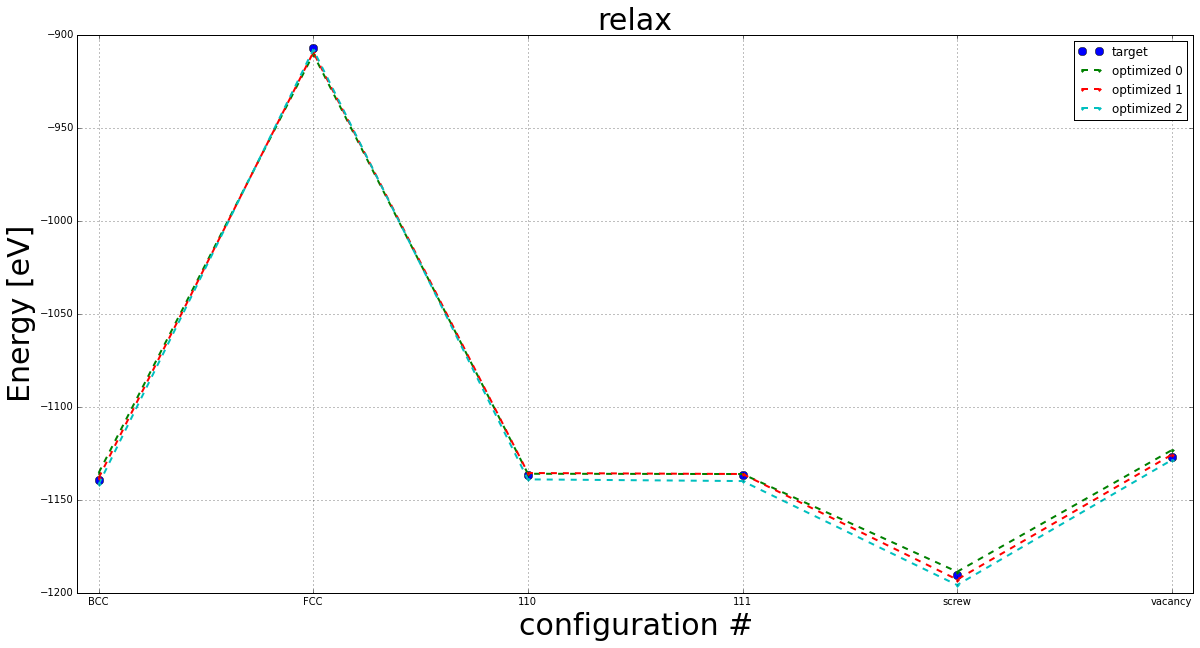

In [148]:
# plot relax
x_ticks = ([0, 1, 2, 3, 4, 5], ['BCC', 'FCC','110','111', 'screw', 'vacancy'])
x_lim=(-0.1, 5.1)
slice_end = len(x_ticks[0])
select = slice(0, slice_end, None)
plot_udif(targets, stats_list, param_list, 'relax', select=select, x_ticks=x_ticks, x_lim=x_lim, shift=0, verbose=1)#-37)#-36)

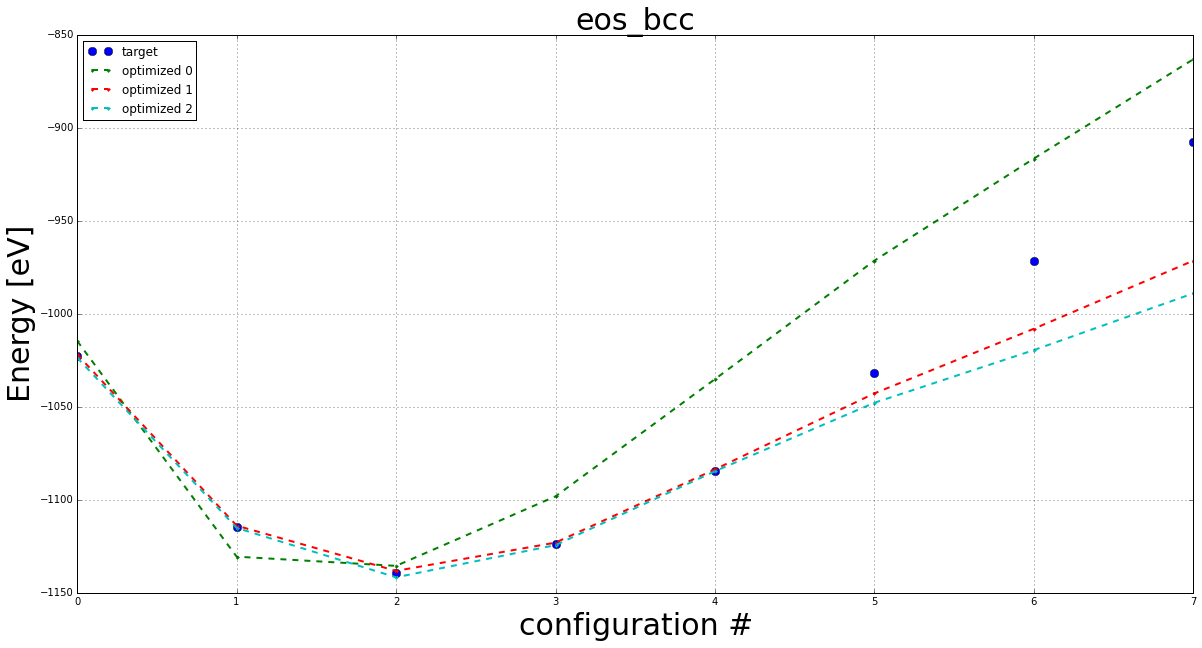

In [149]:
# plot bcc EOS
select = [10, 11, 6, 3, 4, 5, 7, 2, 1, 12, 13, 14, 15, 16, 17, 18]
select = [1, 2, 0, 3, 4, 5, 6, 7]
x_lim = (2, 8)
y_lim = (-9.0, -7.0)
plot_udif(targets, stats_list, param_list, 'eos_bcc')#, select=select, shift=0)#, verbose=1)#-37)#-36)

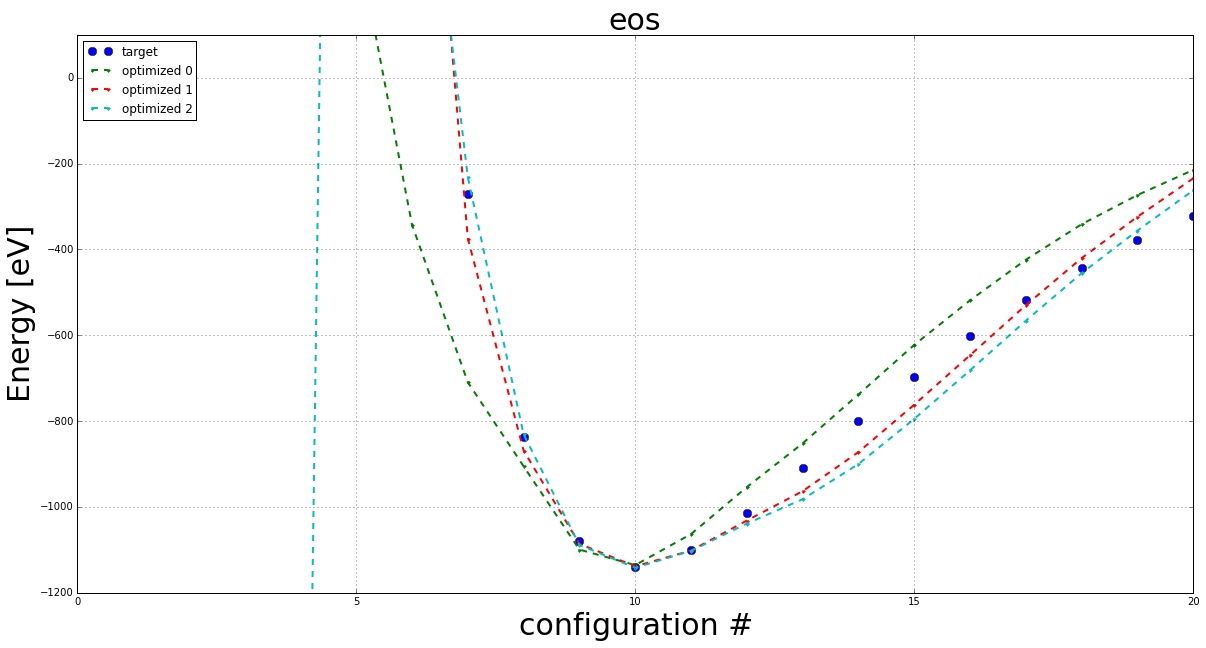

In [150]:
select = [10, 11, 6, 3, 4, 5, 7, 2, 1, 12, 13, 14, 15, 16, 17, 18]
x_lim = (0, )
y_lim = (-1200.0, 100)
plot_udif(targets, stats_list, param_list, 'eos', shift=0, x_lim=x_lim, y_lim=y_lim)#, verbose=1)#-37)#-36)

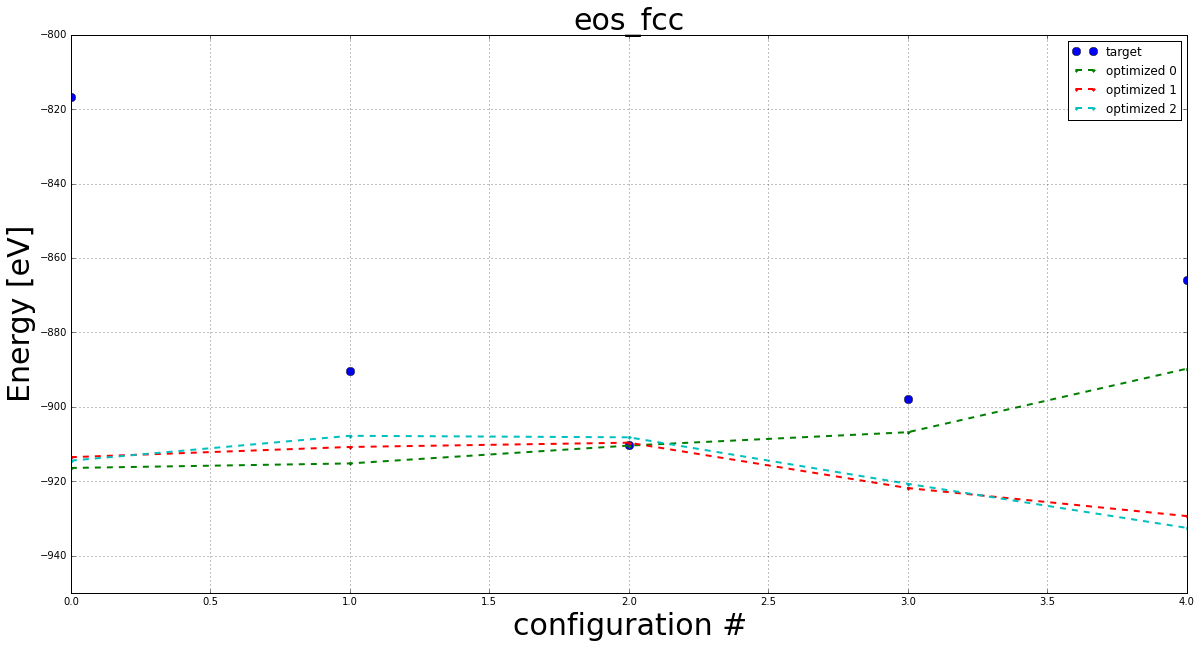

In [151]:
# plot fcc EOS
#select = [1, 2, 3, 0, 5, 6, 7, 4]
select = [0, 1, 2, 3, 4]
x_lim = (0, 4)
y_lim = (-950, -800)
plot_udif(targets, stats_list, param_list, 'eos_fcc', x_lim=x_lim, y_lim=y_lim, select=select)

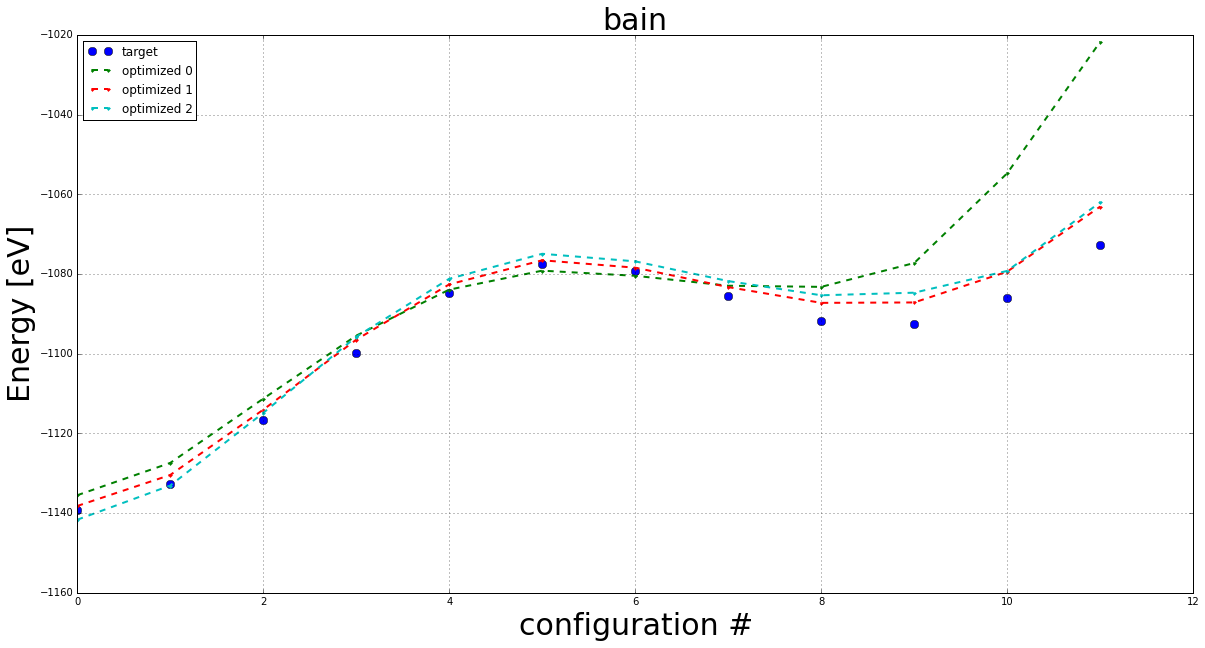

In [140]:
# plot bain path
plot_udif(targets, stats_list, param_list, 'bain')

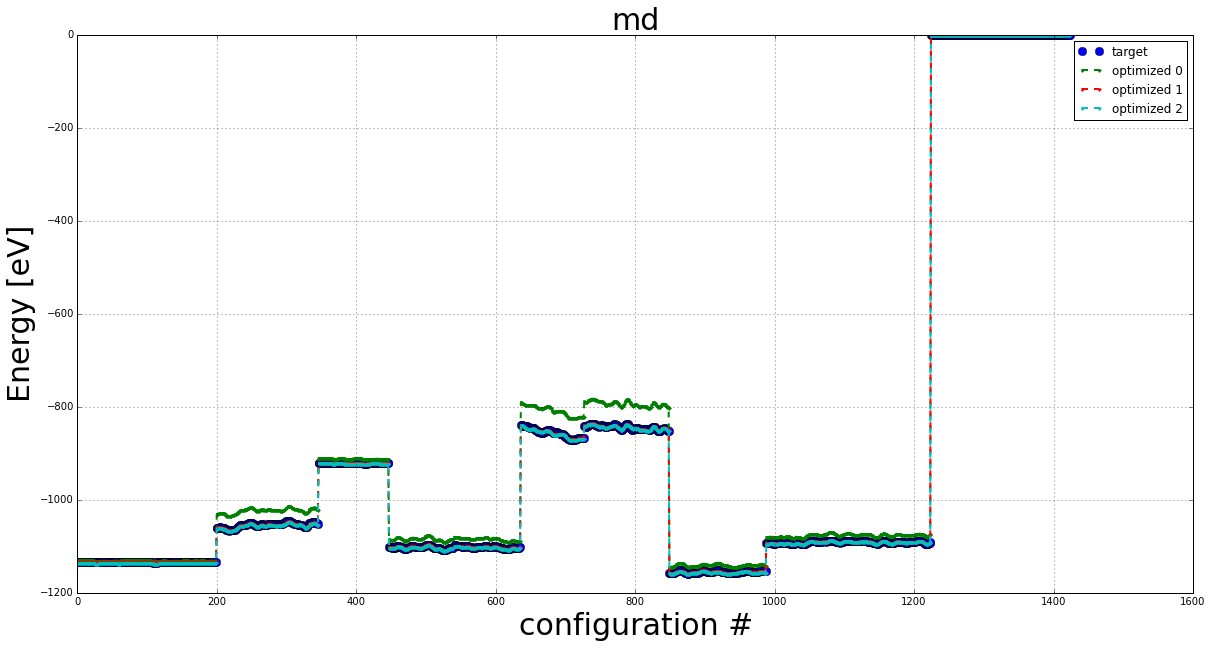

In [141]:
# all trajectories together
x_lim = (346, 446)
y_lim = (-930, -905)
plot_udif(targets, stats_list, param_list, 'md')#, x_lim=x_lim, y_lim=y_lim)

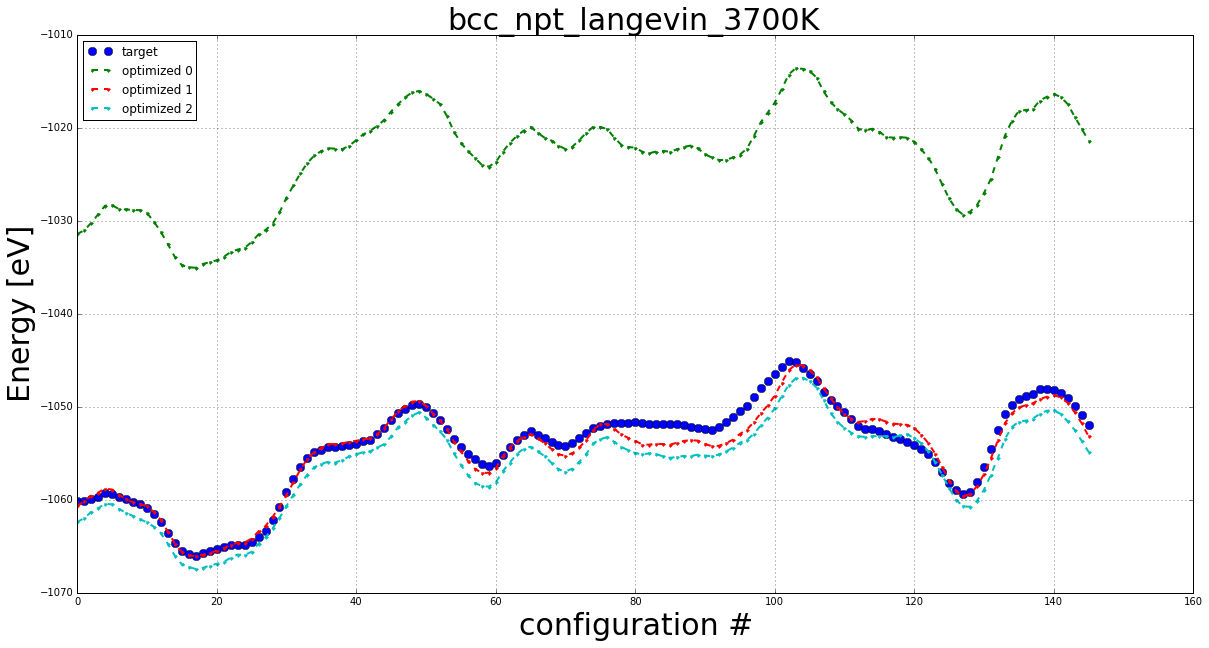

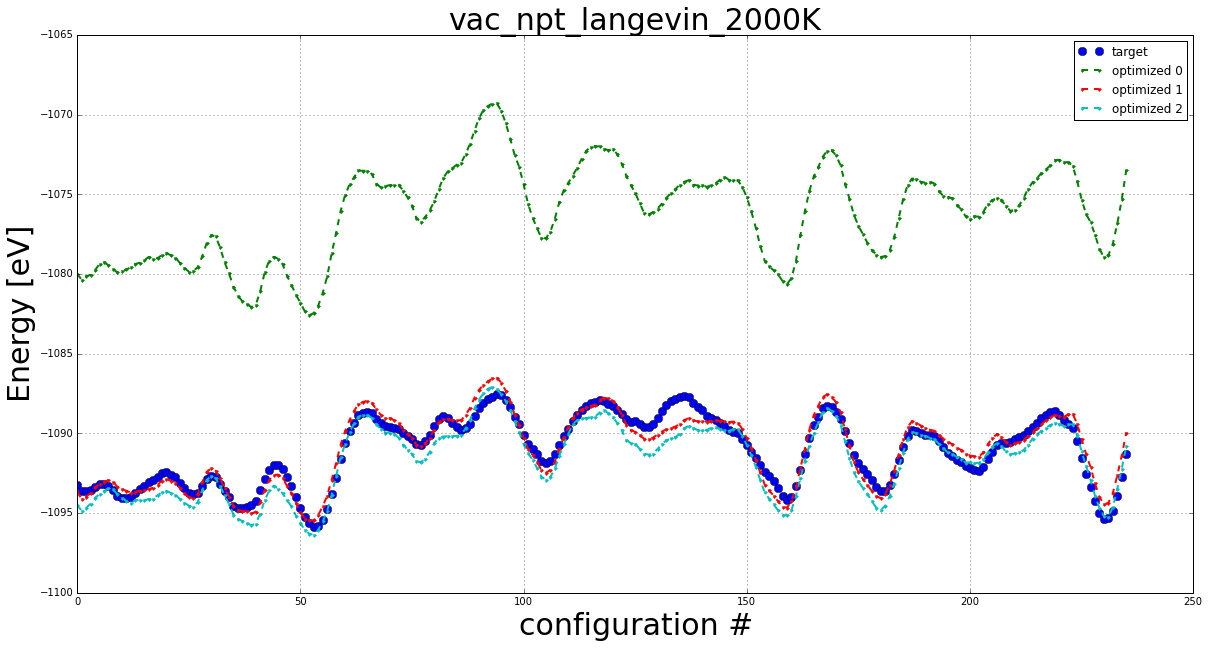

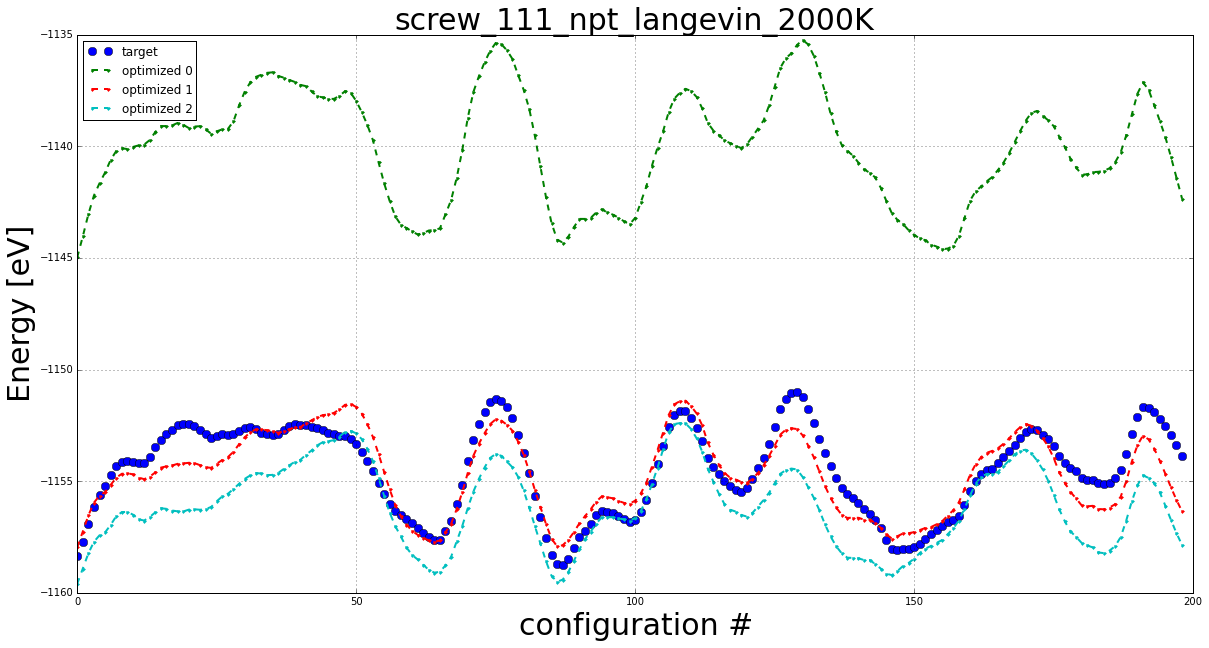

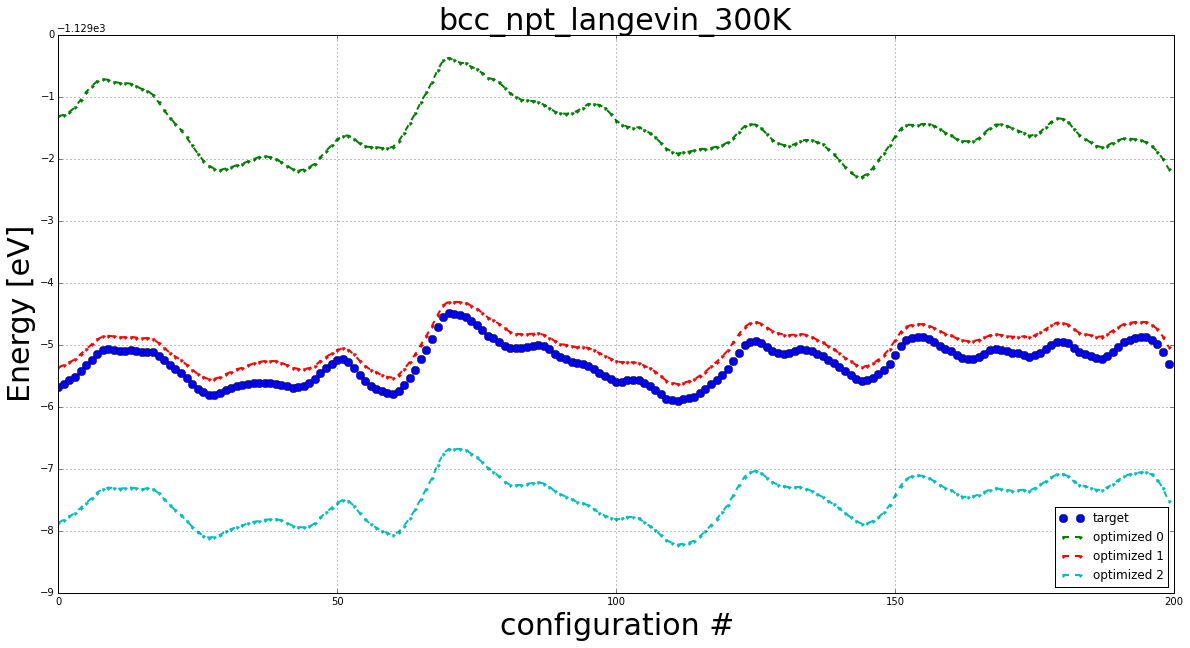

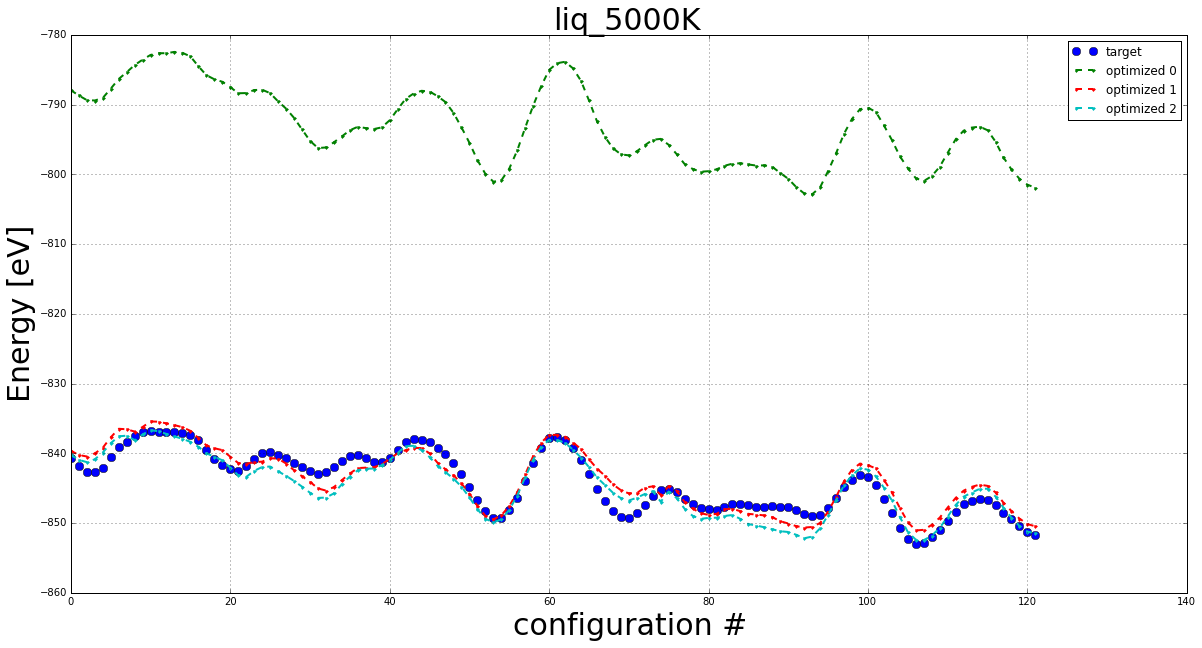

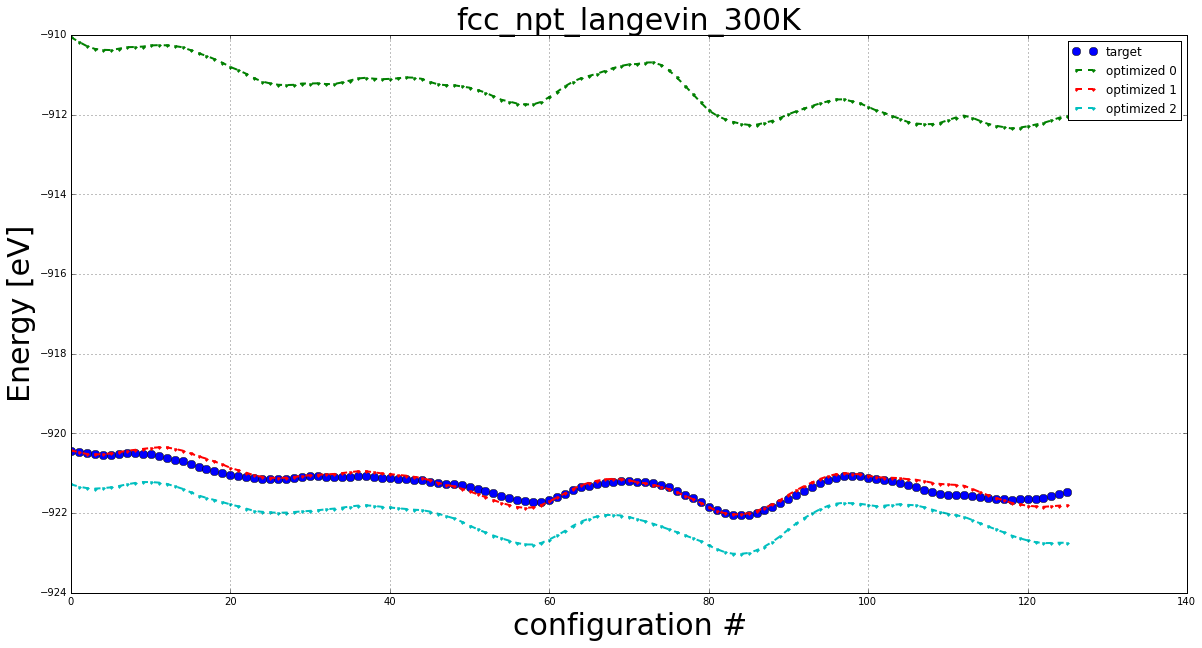

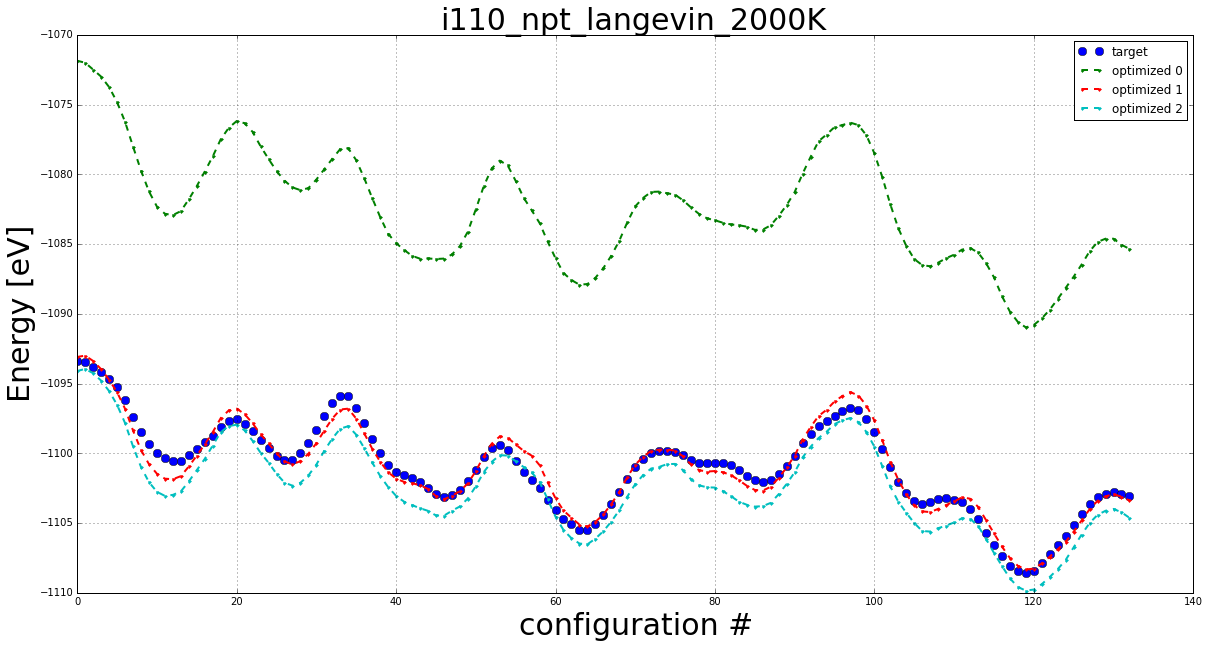

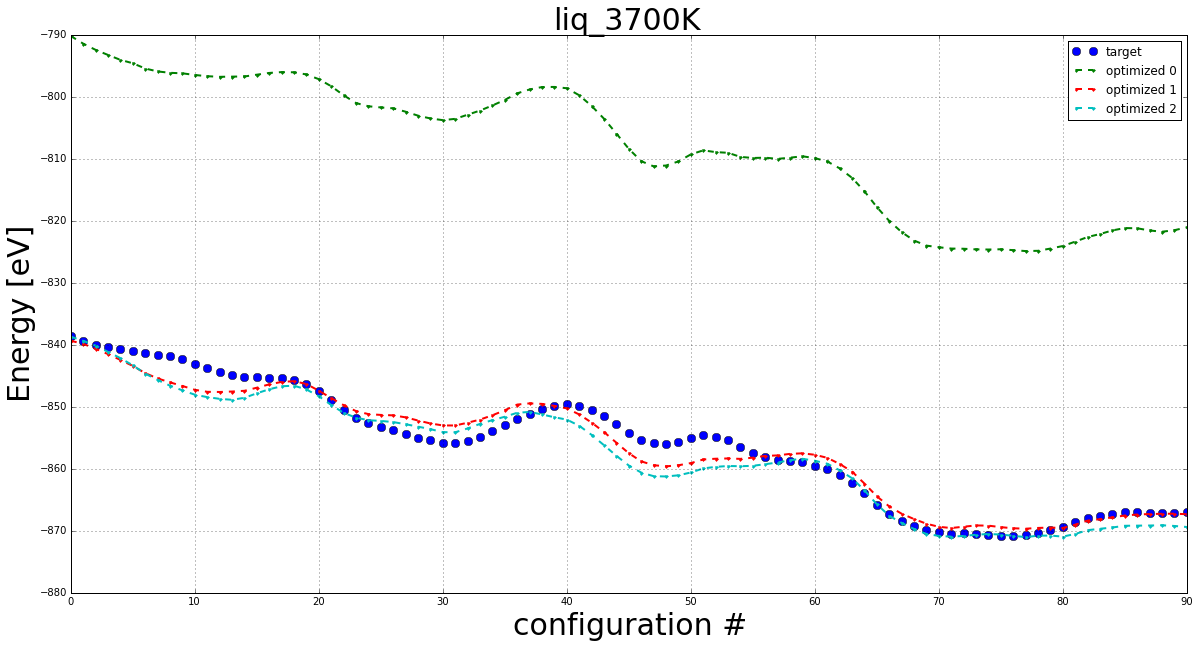

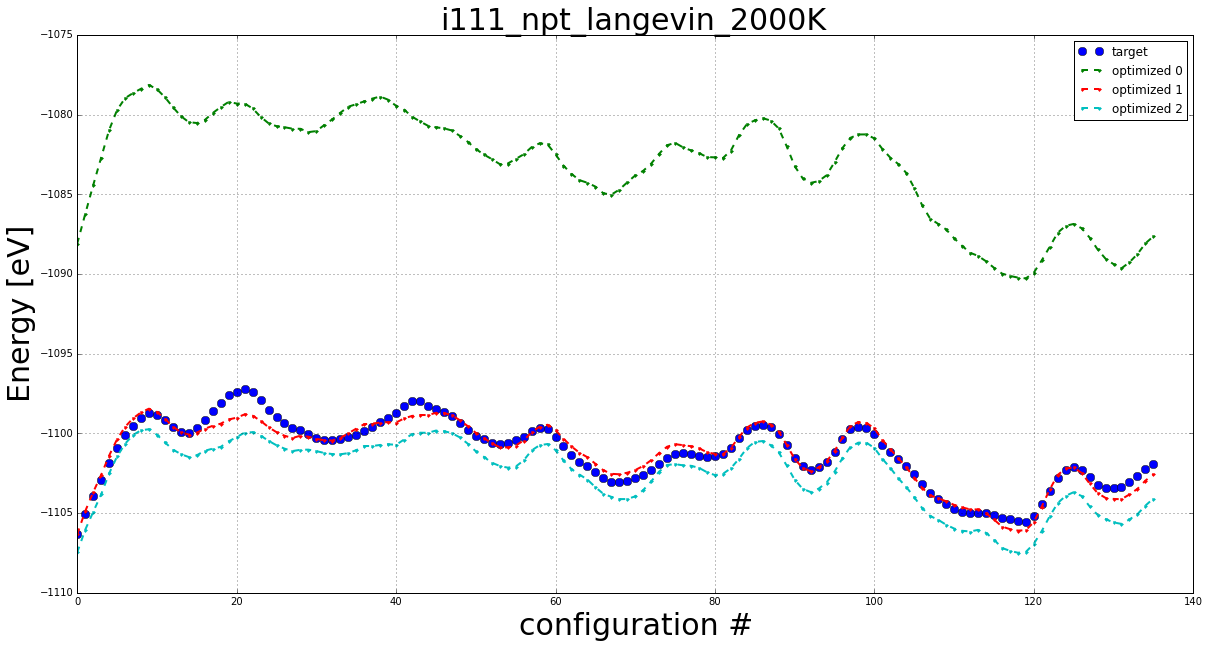

In [142]:
# individual trajectories
for traj in targets.keys():
    if 'npt' in traj or 'liq' in traj:
        plot_udif(targets, stats_list, param_list, traj)

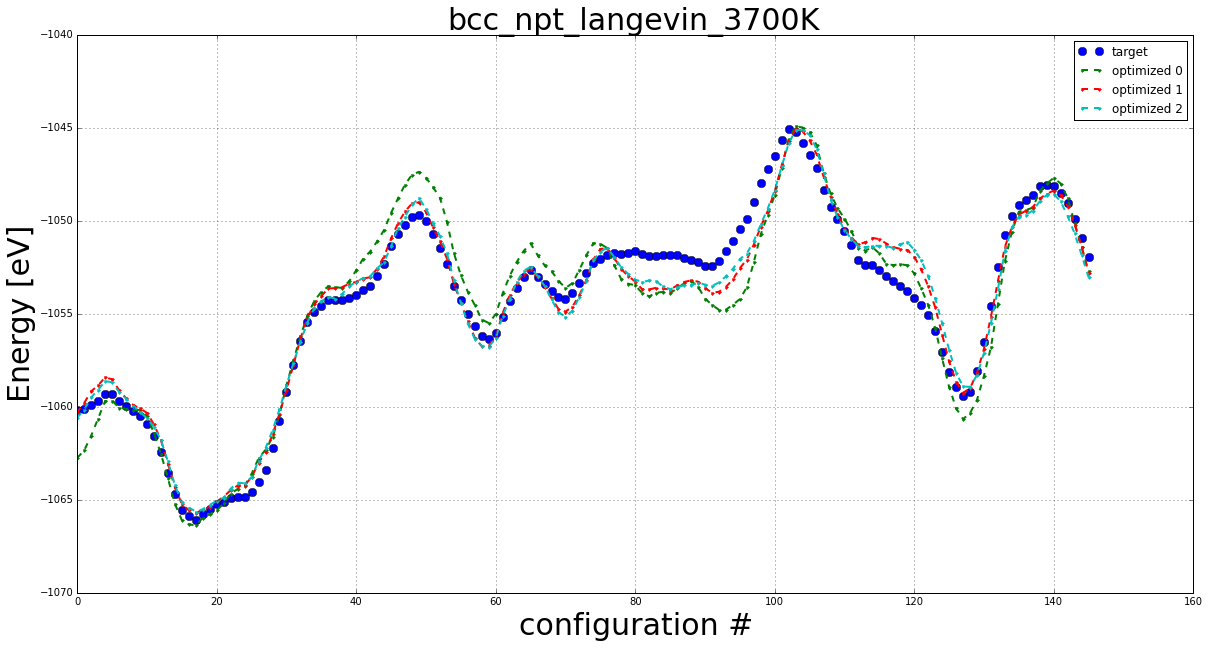

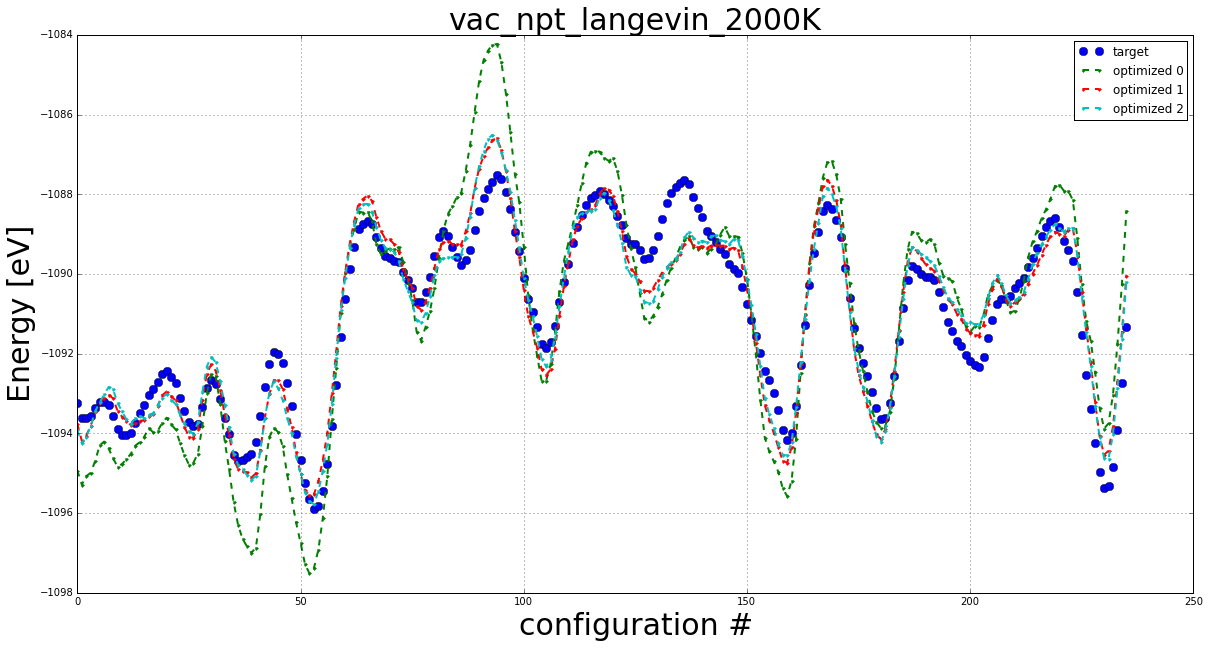

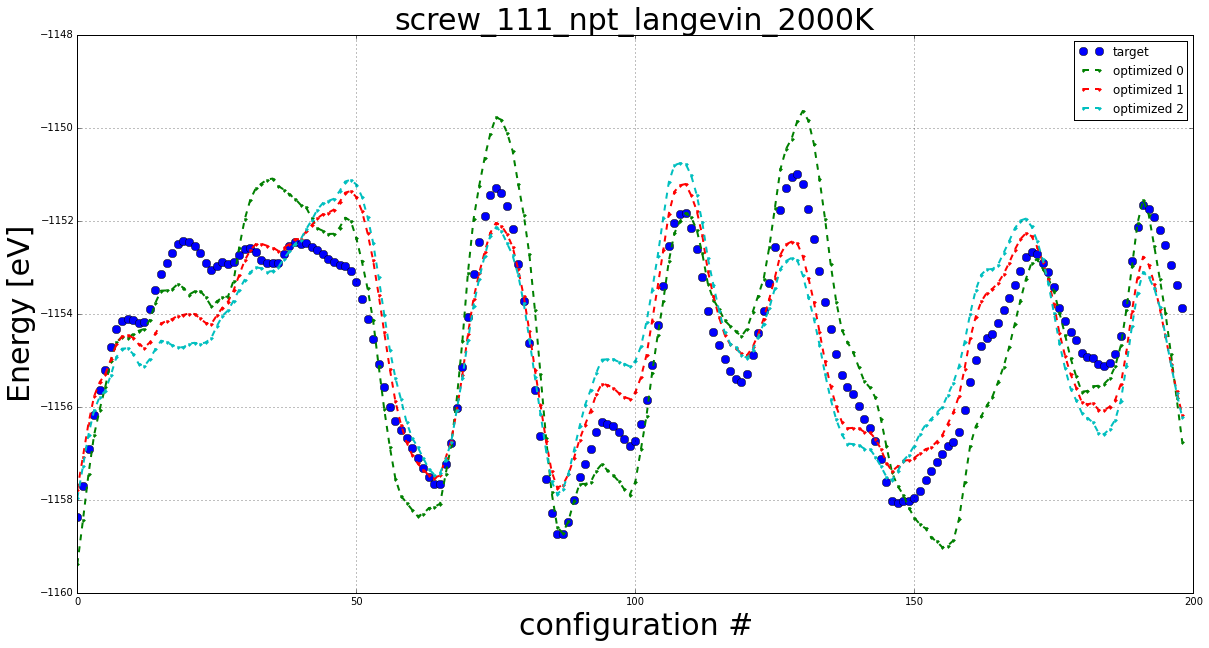

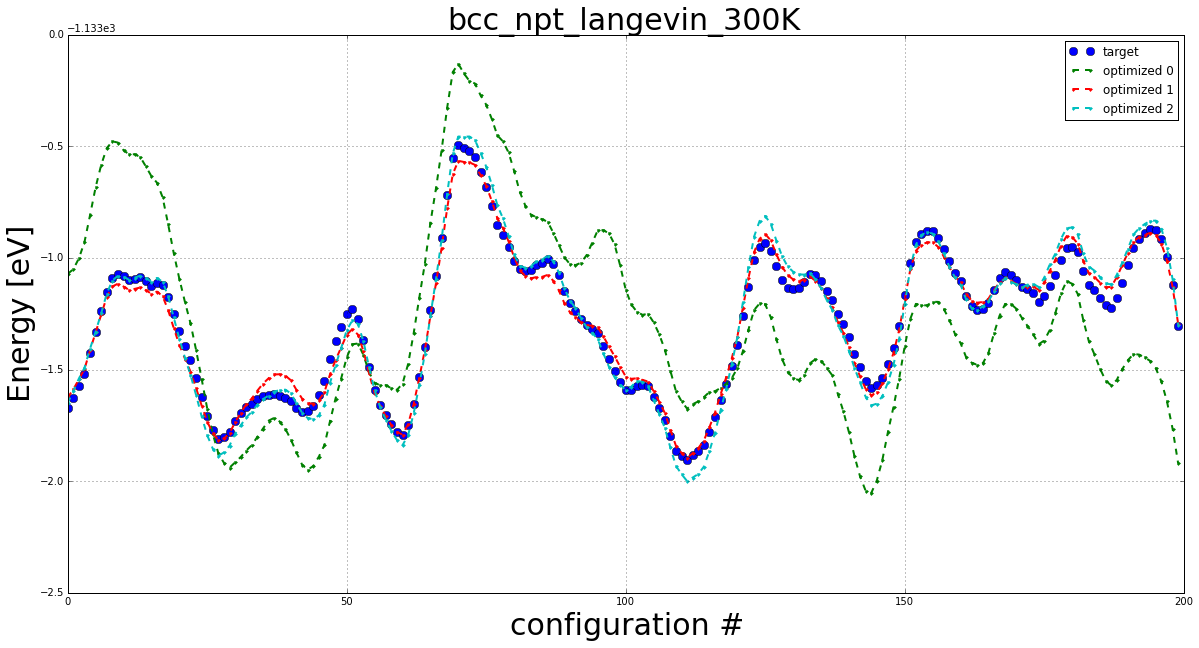

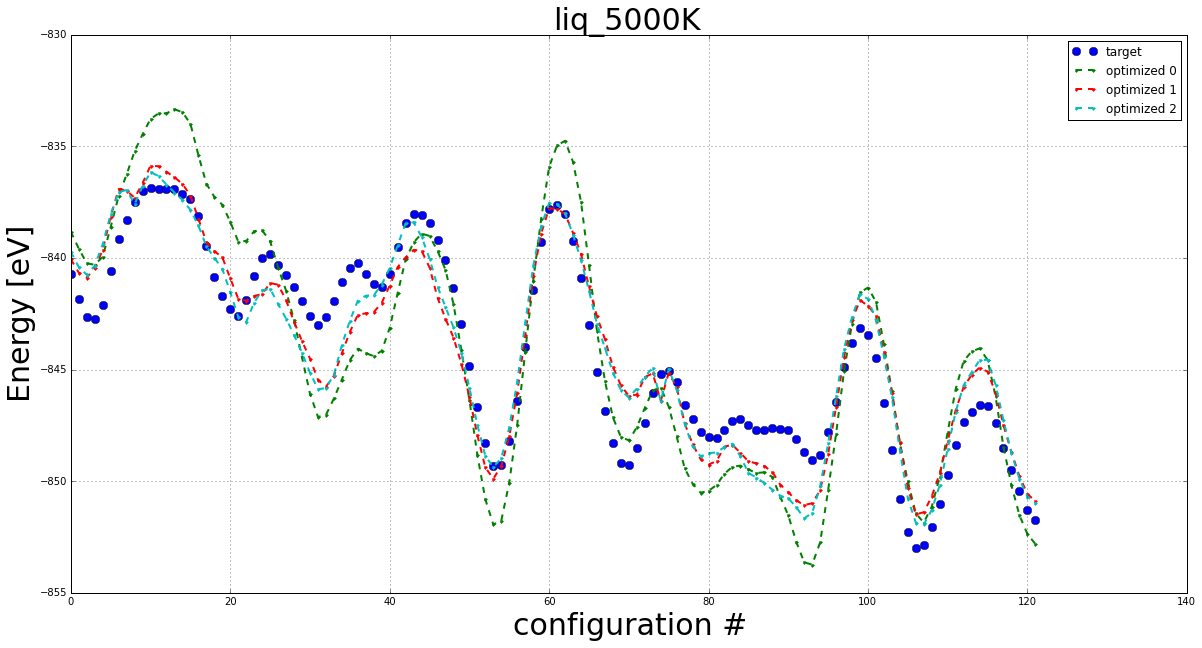

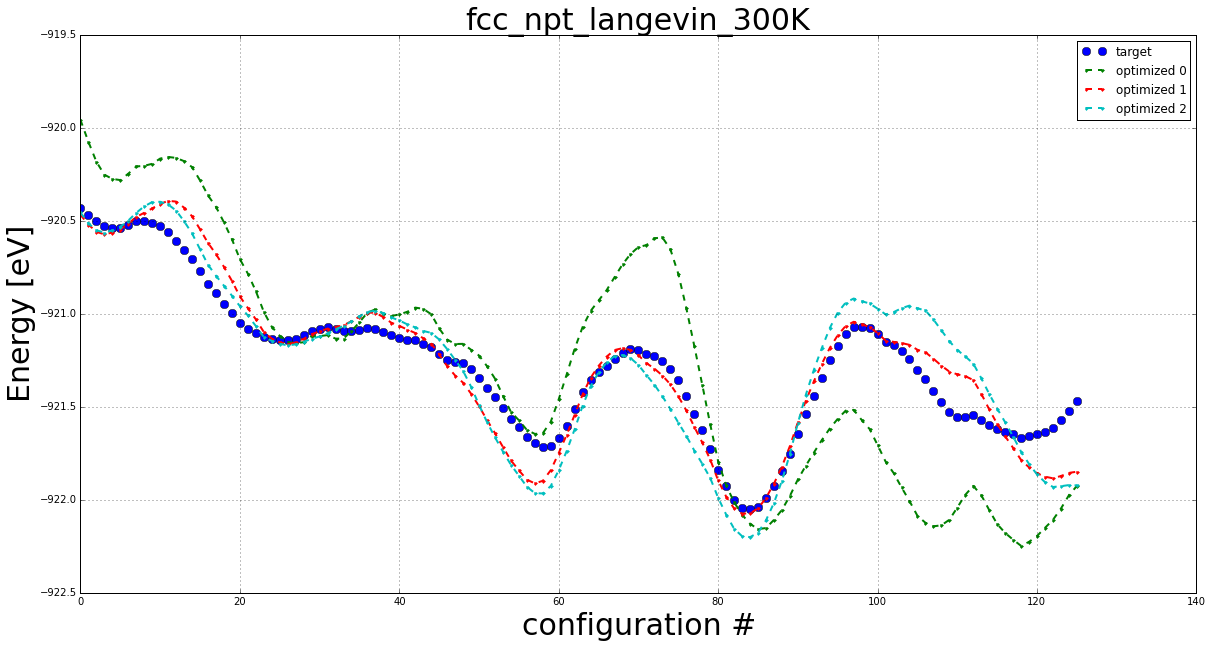

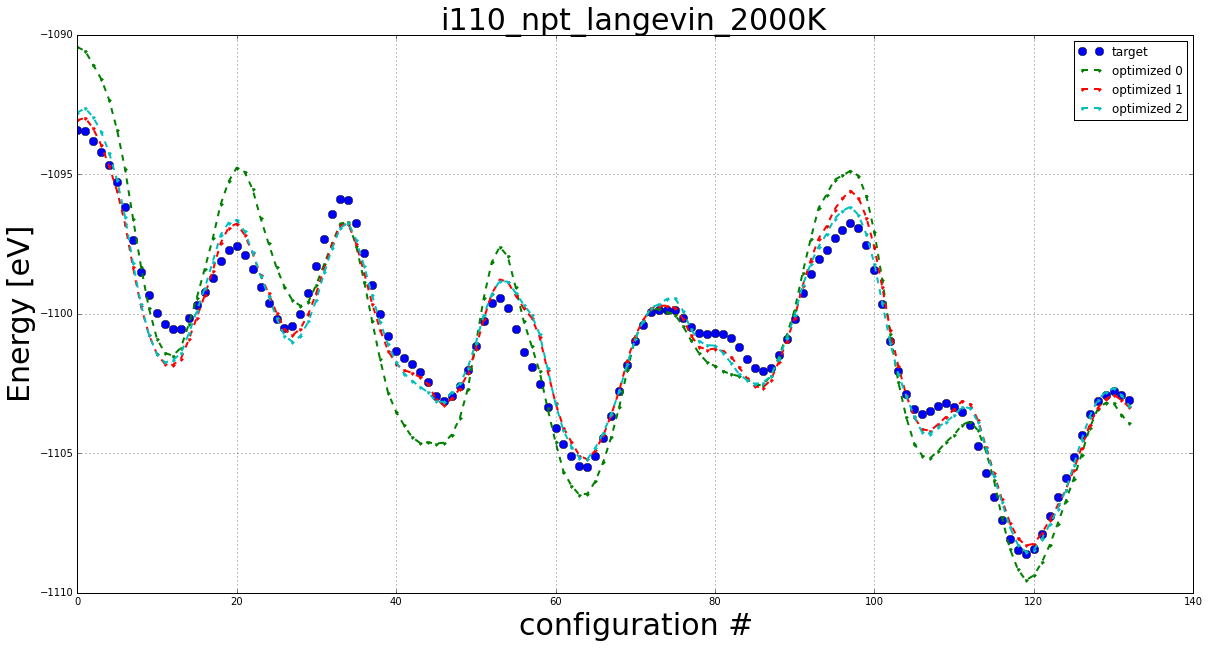

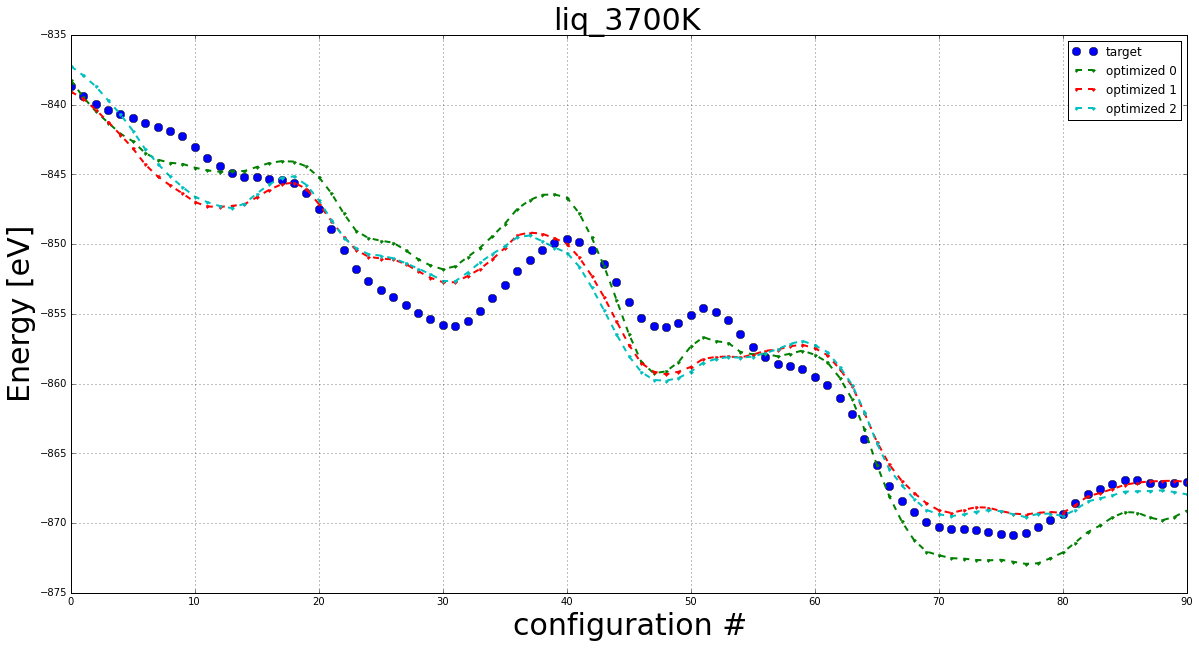

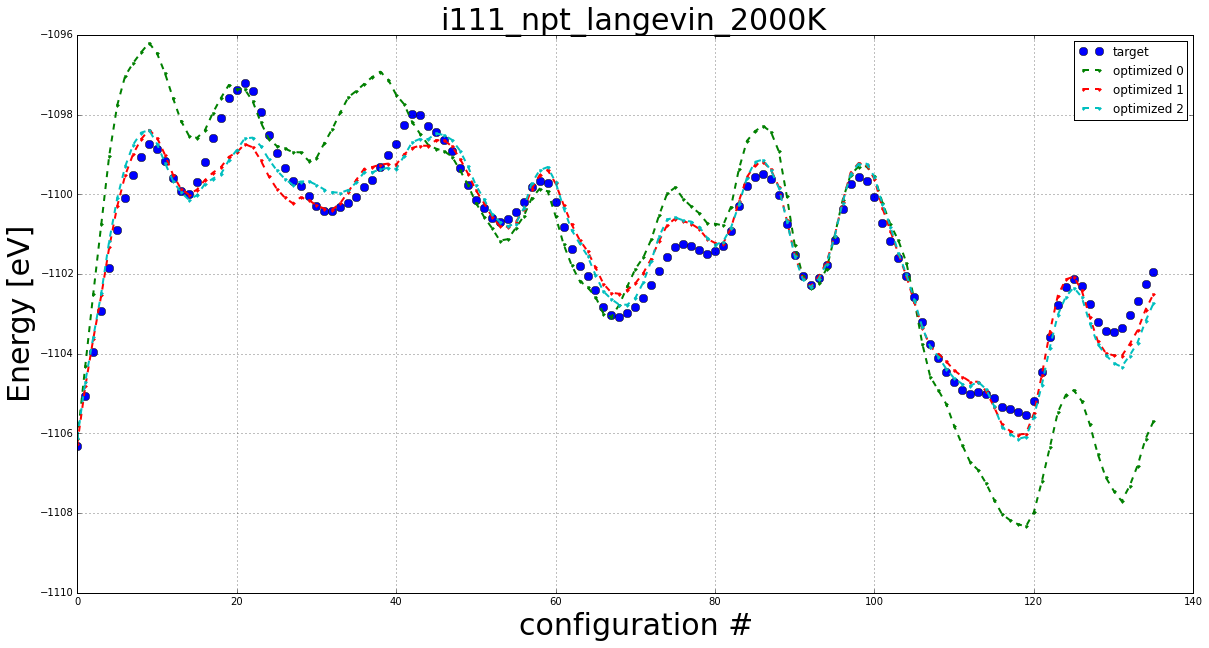

In [143]:
# individual trajectories adjusted for marinica
for traj in targets.keys():
    if 'npt' in traj or 'liq' in traj:
        plot_udif(targets, stats_list, param_list, traj, shift='auto', fname=traj+'adjust')

In [144]:
# Total pair potential
pos = targets['relax']['xyz'][0]
bx = targets['relax']['box'][0]
rr, rx = pair_dist_cutoff(pos, bx, 5.62)

In [145]:
# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d**2

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Cohesive potential (cubic splines - same form as V)
phi = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc and r > 0.01])

rho = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk and r > 0.01])

In [165]:
def eos_ene(param_dict, rrs):
    
    # spline knots
    V_x_r = param_dict['hyperparams']['pair']
    rho_x_r = param_dict['hyperparams']['edens']

    # parameters
    pair_y = param_dict['params']['pair']
    many_y = param_dict['params']['embed']
    rho_x_a = param_dict['params']['edens']
    print('param set', param_dict)
    ene = []
    for a in np.linspace(0.5, 2.1, 161):
        z = a*rrs
        u_pair = 0.5*np.sum([V(x, pair_y, V_x_r) for x in z.flatten() if x > 0.1])

        u_many = 0.0
        dsum = 0.0
        for i in range(z.shape[0]):
            d = np.sum([phi(x, rho_x_a, rho_x_r) for x in z[i] if x > 0.1])
            dsum += d
            dmax = 59.553
            if d > dmax:
                d = dmax + 0.1*(d - dmax)**0.5
            u_many += F(d, many_y)
            #print('embed', a*2.74, F(d, many_y))
        print('ene', a*2.74, u_pair+u_many, u_pair, u_many, u_many/rrs.shape[0], dsum/rrs.shape[0])

        ene.append([a, u_pair, u_many, u_pair+u_many])

    return np.array(ene)

In [166]:
ene_eos = []
for pars, stats in zip(param_list, stats_list)[:-1]:
    ene_eos.append(eos_ene(pars, rr))

('param set', {'hyperparams': {u'pair': [2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.9730449999999999, 3.0797724999999998, 3.5164724999999999, 3.8464450000000001, 4.1764175000000003, 4.7008450000000002, 4.8952999999999998, 5.0897550000000003, 5.3429525, 5.4016950000000001, 5.4604375000000003], u'edens': [2.5, 2.8663175000000001, 3.1000000000000001, 3.5, 4.5, 4.9000000000000004]}, 'params': {'pair': array([  0.00000000e+00,   0.00000000e+00,   9.60851701e+01,
        -1.84410924e+02,   9.35784080e+01,  -7.98358265e+00,
         7.47034093e+00,  -1.52756044e+00,   1.25205933e+00,
         1.63082162e+00,  -1.41854775e+00,  -8.19936046e-01,
         1.98013514e+00,  -6.96430180e-01,   3.04546910e-02,
        -1.63131143e+00,   1.38409896e+00]), 'edens': array([-4.20429108,  0.        ,  0.5182177 ,  0.05627208,  0.        ,
        0.03441642]), 'embed': array([-5.946454, -0.049477]), 'lrcorr': array([ 0.])}})
('ene', 1.37000

('ene', 2.9318000000000004, -1018.4343566896772, 306.28490491083437, -1324.7192616005116, -10.349369231253997, 2.8054296534916801)
('ene', 2.9592000000000005, -995.93280866371481, 290.30348589460175, -1286.2362945583166, -10.048721051236848, 2.6601287577567789)
('ene', 2.9865999999999997, -974.34104852348332, 274.89396912807962, -1249.2350176515629, -9.759648575402835, 2.5227082395626015)
('ene', 3.0140000000000007, -953.7478837897653, 259.76476537235533, -1213.5126491621206, -9.4805675715790674, 2.3922947434907043)
('ene', 3.0413999999999999, -933.77176985949143, 245.1290430294506, -1178.900812888942, -9.2101626006948596, 2.2681696344792499)
('ene', 3.0688000000000004, -913.95233583162235, 231.287462794829, -1145.2397986264514, -8.9471859267691514, 2.149672115647947)
('ene', 3.0962000000000001, -893.83348475671721, 218.5371169862982, -1112.3706017430154, -8.6903953261173079, 2.036172493346208)
('ene', 3.1236000000000006, -873.14717740489777, 207.06625941786882, -1080.2134368227667, -8

('ene', 4.6854000000000005, -16.646381579834738, 14.238694556908481, -30.885076136743219, -0.2412896573183064, 0.0016464964682311402)
('ene', 4.7128000000000005, -8.942788286707188, 15.174349808888081, -24.117138095595269, -0.18841514137183804, 0.0010039573056189379)
('ene', 4.7402000000000006, -1.8359242916994525, 16.095797514210922, -17.931721805910374, -0.1400915766086748, 0.00055501896701834073)
('ene', 4.7676000000000007, 4.5433129805354007, 16.933257554343299, -12.389944573807899, -0.09679644198287421, 0.00026497361490054828)
('ene', 4.7949999999999999, 10.040222232172052, 17.617867112442259, -7.5776448802702054, -0.05920035062711098, 9.9113411736762128e-05)
('ene', 4.8224, 14.451882463537416, 18.080763371664879, -3.6288809081274644, -0.028350632094745816, 2.2730519998184212e-05)
('ene', 4.8498000000000001, 17.448604994798789, 18.253083515168257, -0.80447852036946854, -0.006284988440386473, 1.1171021560163135e-06)
('ene', 4.8772000000000002, 18.070391064139486, 18.070391064139486

('ene', 2.2742000000000004, -140.30185781386353, 4810.9896918490695, -4951.291549662933, -38.681965231741664, 50.210122869029384)
('ene', 2.3016000000000005, -252.38402581539685, 4049.7914520269987, -4302.1754778423956, -33.610745920643716, 42.326588713776609)
('ene', 2.3290000000000006, -374.59523948335755, 3407.3510055995293, -3781.9462450828869, -29.546455039710054, 35.747593809366613)
('ene', 2.3564000000000003, -494.21460869888915, 2868.6326350409317, -3362.8472437398209, -26.272244091717351, 30.318364227076639)
('ene', 2.3838000000000004, -604.55992332564574, 2419.0761929205692, -3023.6361162462149, -23.622157158173554, 25.884228126748244)
('ene', 2.4112, -703.17052500752607, 2044.5360229539169, -2747.706547961443, -21.466457405948773, 22.290644123219234)
('ene', 2.4386000000000001, -790.68527484317565, 1730.894492583227, -2521.5797674264027, -19.699841933018771, 19.385348277597341)
('ene', 2.4660000000000002, -868.58598691932639, 1464.8919091254147, -2333.4778960447411, -18.2302

('ene', 4.0552000000000001, -269.76207612253432, -0.22440500941731187, -269.53767111311703, -2.1057630555712268, 0.25573910660575971)
('ene', 4.0826000000000002, -252.00640912432252, -3.0122539624145781, -248.99415516190794, -1.9452668372024058, 0.21825152773204323)
('ene', 4.1100000000000003, -234.44481238806708, -5.4424025844466382, -229.00240980362045, -1.7890813265907848, 0.18461895351979205)
('ene', 4.1374000000000004, -217.11672958958192, -7.5391237752361677, -209.57760581434576, -1.6373250454245762, 0.15463222182254152)
('ene', 4.1648000000000005, -200.06697783741095, -9.3305997922388748, -190.73637804517207, -1.4901279534779068, 0.12808217049382842)
('ene', 4.1922000000000006, -183.39128621689196, -10.894243547995121, -172.49704266889682, -1.3476331458507564, 0.10475963738718848)
('ene', 4.2196000000000007, -167.21983358394627, -12.339965099759288, -154.87986848418697, -1.2099989725327107, 0.084455460356157447)
('ene', 4.2470000000000008, -151.62805916329992, -13.72063914468734

[2.1000000000000001, 2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.9730449999999999, 3.0797724999999998, 3.5164724999999999, 3.8464450000000001, 4.1764175000000003, 4.7008450000000002, 4.8952999999999998, 5.0897550000000003, 5.3429525, 5.4016950000000001, 5.4604375000000003, 5.54, 5.5800000000000001, 5.6200000000000001]


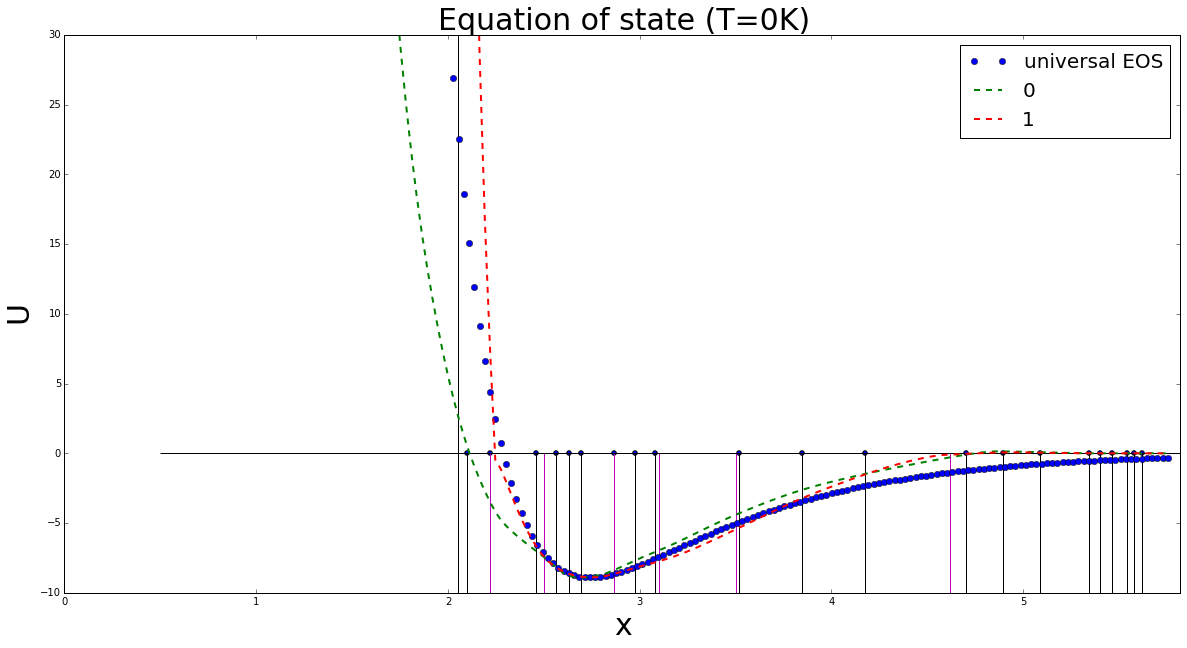

In [168]:
plt.figure(figsize=(20,10))

plt.title('Equation of state (T=0K)', fontsize=30)

plt.plot(ene_eos[0][:,0]*2.74, [universal_eos(x, 'W') for x in ene_eos[0][:,0]], 'o', label='universal EOS')
for i in range(len(param_list)-1): 
    plt.plot(ene_eos[i][:,0]*2.74, ene_eos[i][:,3]/128,'--', lw=2, label=str(i))

plt.scatter(stats_list[-1]['hyperparams']['pair'], np.zeros(len(stats_list[-1]['hyperparams']['pair'])))
plt.vlines(stats_list[-1]['hyperparams']['pair'], -10, 0)
plt.vlines(stats_list[-1]['hyperparams']['edens'], -10, 0, colors='m')

#plt.vlines(np.linspace(2.25, 5.5, 14), -10, 0, colors='r')
#plt.vlines([2.26, 2.5 , 2.66, 2.74, 2.86, 3.06, 3.30, 3.62 , 3.9, 4.22, 4.54, 4.86, 5.18, 5.5], -10, 0, colors='g')
print(stats_list[-1]['hyperparams']['pair'])

plt.vlines([2.05], -10, 30)
plt.hlines(0.0,0.5,6.0,lw=1)
plt.legend(loc='best', fontsize=20)
plt.xlim(0.0, 5.82)
#plt.xlim(4.5, 5.62)
plt.ylim(-10,30)
#plt.ylim(-0.1,0.2)

plt.xlabel('x', fontsize=30)
plt.ylabel(r'U', fontsize=30)
plt.savefig(os.path.join(reports, 'universal_eos'+'.png'))

In [52]:
9.5586708487499994/12.74489446*2.74

2.055000000806205

In [55]:
param_list[2]

{'hyperparams': {u'edens': [2.2200000000000002,
   2.5,
   2.8663175000000001,
   3.1000000000000001,
   3.5,
   4.6200000000000001],
  u'pair': [2.1000000000000001,
   2.2200000000000002,
   2.46,
   2.5648974999999998,
   2.6297950000000001,
   2.6946924999999999,
   2.8663175000000001,
   2.9730449999999999,
   3.0797724999999998,
   3.5164724999999999,
   3.8464450000000001,
   4.1764175000000003,
   4.7008450000000002,
   4.8952999999999998,
   5.0897550000000003,
   5.3429525,
   5.4016950000000001,
   5.4604375000000003,
   5.54,
   5.5800000000000001,
   5.6200000000000001]},
 'params': {'edens': [1657.5459,
   -103.315521,
   38.6317998,
   -1.37580192,
   -2.15109594,
   0.200163255],
  'embed': [-4.08460829, -0.00138588599],
  'lrcorr': [],
  'pair': [-13250.773,
   1939.28425,
   20.5970852,
   -237.669887,
   121.943656,
   -32.4296128,
   62.640927,
   8.36697799,
   -9.54708966,
   -2.06899378,
   1.75611005,
   -1.35952781,
   -0.73546537,
   1.98598708,
   -0.47345009,

In [148]:
file_name = os.path.join(working, "params_optimal.pickle")

for params in param_list[-1:]:
    params_to_pickle(params, file_name)

In [149]:
with open(file_name, 'rb') as fi:
    params_store = pickle.load(fi)

In [56]:
par = param_list[2]
print('pair')
for c, k in zip(par['params']['pair'], par['hyperparams']['pair']):
    if c > 0.0:
        print('+{0}d0*({1}d0 - r)**3*H({1}d0 - r)'.format(c, k))
    else:
        print('{0}d0*({1}d0 - r)**3*H({1}d0 - r)'.format(c, k))
print('edens')   
for c, k in zip(par['params']['edens'], par['hyperparams']['edens']):
    if c > 0.0:
        print('+{0}d0*({1}d0 - r)**3*H({1}d0 - r)'.format(c, k))
    else:
        print('{0}d0*({1}d0 - r)**3*H({1}d0 - r)'.format(c, k))
print('embed')    
par['params']['embed']

pair
-13250.773d0*(2.1d0 - r)**3*H(2.1d0 - r)
+1939.28425d0*(2.22d0 - r)**3*H(2.22d0 - r)
+20.5970852d0*(2.46d0 - r)**3*H(2.46d0 - r)
-237.669887d0*(2.5648975d0 - r)**3*H(2.5648975d0 - r)
+121.943656d0*(2.629795d0 - r)**3*H(2.629795d0 - r)
-32.4296128d0*(2.6946925d0 - r)**3*H(2.6946925d0 - r)
+62.640927d0*(2.8663175d0 - r)**3*H(2.8663175d0 - r)
+8.36697799d0*(2.973045d0 - r)**3*H(2.973045d0 - r)
-9.54708966d0*(3.0797725d0 - r)**3*H(3.0797725d0 - r)
-2.06899378d0*(3.5164725d0 - r)**3*H(3.5164725d0 - r)
+1.75611005d0*(3.846445d0 - r)**3*H(3.846445d0 - r)
-1.35952781d0*(4.1764175d0 - r)**3*H(4.1764175d0 - r)
-0.73546537d0*(4.700845d0 - r)**3*H(4.700845d0 - r)
+1.98598708d0*(4.8953d0 - r)**3*H(4.8953d0 - r)
-0.47345009d0*(5.089755d0 - r)**3*H(5.089755d0 - r)
-0.0499940237d0*(5.3429525d0 - r)**3*H(5.3429525d0 - r)
-1.45135718d0*(5.401695d0 - r)**3*H(5.401695d0 - r)
+1.19557147d0*(5.4604375d0 - r)**3*H(5.4604375d0 - r)
+0.000175773867d0*(5.54d0 - r)**3*H(5.54d0 - r)
-0.0184569288d0*(5.58d0 -

[-4.08460829, -0.00138588599]

In [57]:
ff_id = 2

# spline knots
pair_r = stats['hyperparams']['pair']
rho_r = stats['hyperparams']['edens']

# parameters
pair_a = param_list[ff_id]['params']['pair']
rho_a = param_list[ff_id]['params']['edens']
many_a = param_list[ff_id]['params']['embed']

In [63]:
# find electronic density maximum
rmax = max([(phi(r, rho_a, rho_r), r) for r in np.linspace(2.05, 4.9, 10000)])
rho_max, r_max = rmax
rho_max, r_max
rhomax = 12.0*phi(r_max, rho_a, rho_r)
rmax, rhomax

((65724.713326083918, 2.0499999999999998), 788696.55991300708)

In [65]:
F(65724.713326083918, many_a)

-5987711.458154242

In [1394]:
# Ranges of densities and separations

nr = 5000
rcut = pair_r[-1]#stats_opt['hyperparams'][-1]
dr = rcut/nr

rhomax = 12.0*phi(r_max, rho_a, rho_r)
print('rhomax:', rhomax)
#rhomax = 10.0
nrho = 5000
drho = rhomax/nrho

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

('rhomax:', 265.02562984198477)


In [1395]:
def u_trans(r, unucl, ueq, ri=1.0, ro=2.0):
    """Transition between the core and equillibrium potentials"""
    if r < ri:
        return unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        return ueq + eta*(unucl - ueq)
    else:
        return ueq

In [1396]:
# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)
r2 = np.linspace(0., rcut, 201)

fembd = [F(d, many_a) for d in dens] # W
edens = np.array([phi(x, rho_a, rho_r) if x > r_max else rho_max for x in r])

# 1. Cubic spline for r > r_o
f_outer = [V(x, pair_a, pair_r) for i, x in enumerate(r)]
# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]
# 3. Transition region for r_i < r < r_o
fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]
#fpair = f_outer

In [1397]:
# LAMMPS format

with open(os.path.join(pot_path, 'W_zeroenx.eam.fs'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    #fo.write(f"{n_el:5d} ")
    fo.write("{0:5d} ".format(n_el))

    for i in range(n_el):
        #fo.write(f"{el_name[i]:2}")
        fo.write("{0:2}".format(el_name[i]))
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    #fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    fo.write("{0:5d}{1:24.16e}{2:5d}{3:24.16e}{4:24.16e}\n".format(nrho, drho, nr, dr, rcut))

    # atomic number, mass, lattice size, lattice type
    #fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    fo.write("{0:5d} {1:14.4f} {2:14.4f} {3:10}\n".format(na, ma, lc, alat))

    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))

In [51]:
def abcd(fm1, f, fp1, fp2, dx):
    a  = f
    b  = (fp1-fm1)/2.0
    b1 = (fp2-a)/2.0
    d  = (b1 + b + 2.0*(a-fp1))
    c  = (b1-b-3.0*d)/2.0

    b = b/dx
    c = c/dx**2
    d = d/dx**3

    return a, b, c, d

In [132]:
param_list[-1]['hyperparams']

{u'edens': [2.5, 3.1000000000000001, 3.5, 4.9000000000000004],
 u'pair': [2.5648974999999998,
  2.6297950000000001,
  2.6946924999999999,
  2.8663175000000001,
  2.9730449999999999,
  3.0797724999999998,
  3.5164724999999999,
  3.8464450000000001,
  4.1764175000000003,
  4.7008450000000002,
  4.8952999999999998,
  5.0897550000000003,
  5.3429525,
  5.4016950000000001,
  5.4604375000000003]}

In [ ]:
ff_id = -1

# spline knots
pair_r = stats['hyperparams']['pair']
rho_r = stats['hyperparams']['edens']

# parameters
pair_a = param_list[ff_id]['params']['pair']
rho_a = param_list[ff_id]['params']['edens']
many_a = param_list[ff_id]['params']['embed']

In [ ]:
Npoints = 5000
rmin = 0.01
# maximum distance for pair and edens
rmax = max(stats['hypeerparams']['pair'], stats['hyperparams']['edens'])
r2min = rmin**2
r2max = rmax**2
dr2 = (r2max-r2min)/float(Npoints)

In [ ]:
def func_pair(r, coeffs, knots):
    
    ri = 1.0
    ro = 2.0
    
    if r > ro:
        u = V(r, coeffs, knots)
        
    elif r > ri:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        u = ueq + eta*(u_core(r) - V(r, coeffs, knots))
    else:
        u = u_core(r)

    return u
        
#     # 1. Cubic spline for r > r_o
#     f_outer = [V(x, coeffs, knots) for i, x in enumerate(r)]
#     # 2. Repulsive core for r < r_i (precalculate up to r_o)
#     f_inner = [0.0] + [u_core(x) for x in r[1:]]
#     # 3. Transition region for r_i < r < r_o
#     fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]

In [ ]:
def generate_datapoints(sfunc, coeffs, knots, Npoints, r2min, dr2):
    work = np.empty((Npoints+1), dtype=float)
    for i in range(Npoints+1):
        r2 = r2min + dr2*float(i)
        rc = np.sqrt(r2)
        work[i] = sfunc(rc, coeffs, knots)

In [ ]:
def write_spline_coeffs(work, Npoints, r2min, dr2):
    
    for i in range(Npoints+1):
        r2 = r2min + dr2*float(i)
        
        # fm1: i - 1
        if i > 0: fm1 = work[i-1]
        else: fm1 = 2.0*work[0]-work[1]
            
        # f0: i
        f0  =  work[i]
        
        # fp1: i + 1
        if i < Npoints: fp1 = work[i+1]
        else: fp1 = 0.0
            
        # fp2: i + 2
        if i < Npoints-1: fp2 = work[i+2]
        elif i == Npoints-1: fp2 = work[Npoints-1]
        elif i == Npoints: fp2 = 0.0
        
        a, b, c, d = abcd(fm1, f0, fp1, fp2, dr2)
        fo.write("{0} {1} {2} {3} {4}".format(a, b, c, d, r2))

In [ ]:
# Yuri pair
with open(os.path.join(pot_path, 'W.pair'), 'w') as fo:
    
    fo.write("{0} {1} {2} {3} {4}".format(rmax,r2max,r2min,1.0/dr2,Npoints+1))
    
    coeffs = params['params']['pair']
    knots = params['hyperparams']['pair']
    work = generate_datapoints(func_pair, coeffs, knots, Npoints, r2min, dr2)
    
    write_spline_coeffs(work, Npoints, r2min, dr2)

In [ ]:
# Yuri edens
with open(os.path.join(pot_path, 'W.edens'), 'w') as fo:
    fo.write("{0} {1} {2} {3} {4}".format(rmax,r2max,r2min,1.0/dr2,Npoints+1))
    
    coeffs = params['params']['edens']
    knots = params['hyperparams']['edens']
    
    work = generate_datapoints(func_edens, coeffs, knots, Npoints, r2min, dr2)
    
    write_spline_coeffs(work, Npoints, r2min, dr2)


In [ ]:
# Yuri embed
with open(os.path.join(pot_path, 'W.embed'), 'w') as fo:


In [ ]:
# Yuri's format

with open(os.path.join(pot_path, 'W_pair.yuri'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    #fo.write(f"{n_el:5d} ")
    fo.write("{0:5d} ".format(n_el))

    for i in range(n_el):
        #fo.write(f"{el_name[i]:2}")
        fo.write("{0:2}".format(el_name[i]))
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    #fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    fo.write("{0:5d}{1:24.16e}{2:5d}{3:24.16e}{4:24.16e}\n".format(nrho, drho, nr, dr, rcut))

    # atomic number, mass, lattice size, lattice type
    #fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    fo.write("{0:5d} {1:14.4f} {2:14.4f} {3:10}\n".format(na, ma, lc, alat))

    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))